In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import numpy as np
import skimage.io as io

import matplotlib
%matplotlib inline

import utils, morph

In [21]:
from pathlib import Path
data = Path("input")
data.mkdir(parents=True, exist_ok=True)

In [22]:
# matplotlib.use("TkAgg")
# matplotlib.use("Tk")
# matplotlib.interactive(True)

# Alignment

In [5]:
%matplotlib tk
if not Path("input/me_align.pkl").exists():
    me_align_pts = utils.pick_points("input/me_original.jpg", 2, APPEND_CORNERS=False)
    utils.save_points(me_align_pts, "input/me_align.pkl")
me_align_pts = utils.load_points("input/me_align.pkl")

if not Path("input/iu_align.pkl").exists():
    iu_align_pts = utils.pick_points("input/iu_original.jpg", 2, APPEND_CORNERS=False)
    utils.save_points(iu_align_pts, "input/iu_align.pkl")
iu_align_pts = utils.load_points("input/iu_align.pkl")

In [6]:
%matplotlib inline

In [7]:
iu_align_pts

array([[323.27199216, 531.44349544],
       [572.88686297, 533.47288463]])

In [8]:
iu_align_pts

array([[323.27199216, 531.44349544],
       [572.88686297, 533.47288463]])

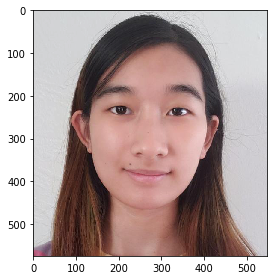

In [9]:
me = utils.to_img_arr("input/me.jpg")
io.imshow(me)

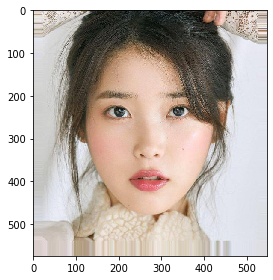

In [10]:
iu = utils.to_img_arr("input/iu.jpg")
io.imshow(iu)

# Triangulation

In [11]:
NUM_POINTS = 51

In [12]:
%matplotlib tk
if not Path("input/me.pkl").exists():
    me_pts = utils.pick_points("input/me.jpg", NUM_POINTS)
    utils.save_points(me_pts, "input/me.pkl")
me_pts = utils.load_points("input/me.pkl")

In [13]:
%matplotlib tk
if not Path("input/iu.pkl").exists():
    iu_pts = utils.pick_points("input/iu.jpg", NUM_POINTS)
    utils.save_points(iu_pts, "input/iu.pkl")
iu_pts = utils.load_points("input/iu.pkl")

# Compute Morphing

In [14]:
%matplotlib inline

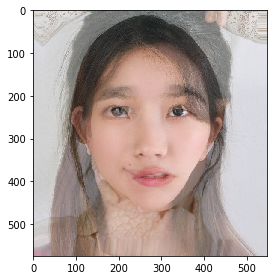

In [15]:
middle_img, triangulation = morph.compute_middle_object(me, iu, me_pts, iu_pts, alpha=0.5)
io.imshow(middle_img)

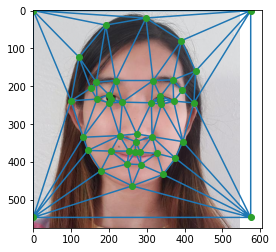

In [16]:
morph.plot_tri_mesh(me, me_pts, triangulation)

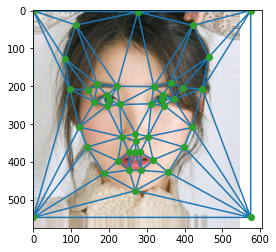

In [17]:
morph.plot_tri_mesh(iu, iu_pts, triangulation)

Frame 1 morph time with alpha 0.0: 0.5208640098571777
Frame 2 morph time with alpha 0.010101010101010102: 0.5458860397338867
Frame 3 morph time with alpha 0.020202020202020204: 0.5446009635925293
Frame 4 morph time with alpha 0.030303030303030304: 0.5820999145507812
Frame 5 morph time with alpha 0.04040404040404041: 0.5210039615631104
Frame 6 morph time with alpha 0.05050505050505051: 0.5155220031738281
Frame 7 morph time with alpha 0.06060606060606061: 0.4935269355773926
Frame 8 morph time with alpha 0.07070707070707072: 0.49792003631591797
Frame 9 morph time with alpha 0.08080808080808081: 0.5092840194702148
Frame 10 morph time with alpha 0.09090909090909091: 0.5750288963317871
Frame 11 morph time with alpha 0.10101010101010102: 0.5376181602478027
Frame 12 morph time with alpha 0.11111111111111112: 0.5411362648010254
Frame 13 morph time with alpha 0.12121212121212122: 0.5062189102172852
Frame 14 morph time with alpha 0.13131313131313133: 0.5504319667816162
Frame 15 morph time with al

/Users/aprilsin/Library/Python/3.8/lib/python/site-packages/matplotlib/cbook/__init__.py:682: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x = np.array(x, subok=True, copy=copy)


TypeError: Image data of dtype object cannot be converted to float

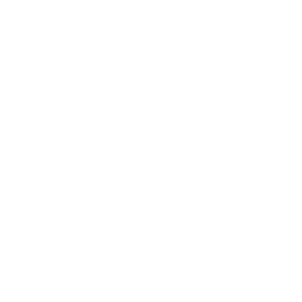

In [20]:
video_path = Path("output/me_iu.mov")
video_frames = morph.compute_morph_video(me, iu, me_pts, iu_pts, video_path, num_frames=100, fps=25)

# Population Mean

In [29]:
import population_mean as pop
pop_dir = Path("imm_face_db")
all_imgs = list(Path(pop_dir).glob("*-1*.jpg"))
all_pts = list(Path(pop_dir).glob("*-1*.asf"))
population_mean = pop.compute_population_mean(all_imgs, all_pts)

(0.6157006, 0.72945964)
[0.6157006  0.72945964]
(0.59755546, 0.73349059)
[0.59755546 0.73349059]
(0.68324095, 0.7469269)
[0.68324095 0.7469269 ]
(0.6764462, 0.67932632)
[0.6764462  0.67932632]
(0.63633537, 0.72914386)
[0.63633537 0.72914386]
(0.59755546, 0.72811604)
[0.59755546 0.72811604]
(0.63485384, 0.72542876)
[0.63485384 0.72542876]
(0.61706148, 0.71750272)
[0.61706148 0.71750272]
(0.61469257, 0.78320503)
[0.61469257 0.78320503]
(0.6335969, 0.73096865)
[0.6335969  0.73096865]
(0.66348286, 0.75714692)
[0.66348286 0.75714692]
(0.6857107, 0.72394937)
[0.6857107  0.72394937]
(0.6792087, 0.68108886)
[0.6792087  0.68108886]
(0.56378527, 0.78456271)
[0.56378527 0.78456271]
(0.65481349, 0.70003546)
[0.65481349 0.70003546]
(0.61267638, 0.68243247)
[0.61267638 0.68243247]
(0.5854587, 0.7079615)
[0.5854587 0.7079615]
(0.63283771, 0.69989973)
[0.63283771 0.69989973]
(0.61267638, 0.69183791)
[0.61267638 0.69183791]
(0.60395663, 0.80618257)
[0.60395663 0.80618257]
(0.59085183, 0.74121998)
[0.59

In [ ]:
utils.align_img("imm_face_db/01-1m.jpg", points="imm_face_db/01-1m.asf", left_idx=10, right_idx=14)

[0.59755546 0.72811604] [0.56932962 0.49298009]
0.23682401277342655


In [73]:
male_imgs = list(Path(pop_dir).glob("*-1m.jpg"))
male_pts = list(Path(pop_dir).glob("*-1m.asf"))
female_imgs = list(Path(pop_dir).glob("*-1f.jpg"))
female_pts = list(Path(pop_dir).glob("*-1f.asf"))


# Bells and Whistles

In [31]:
%matplotlib tk
if not Path("input/im_ugly.pkl").exists():
    other_pts = utils.pick_points("input/im_ugly.jpg", NUM_POINTS)
    utils.save_points(other_pts, "input/im_ugly.pkl")
other_pts = utils.load_points("input/im_ugly.pkl")

In [32]:
other = utils.to_img_arr("input/im_ugly.jpg")

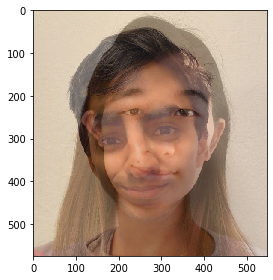

In [39]:
%matplotlib inline
middle_img = morph.compute_middle_object(me, other, me_pts, other_pts, alpha=0.5)
io.imshow(middle_img)

Frame 1 morph time with alpha 0.0: 0.4809732437133789
Frame 2 morph time with alpha 0.010101010101010102: 0.5343279838562012
Frame 3 morph time with alpha 0.020202020202020204: 0.5129489898681641
Frame 4 morph time with alpha 0.030303030303030304: 0.48418712615966797
Frame 5 morph time with alpha 0.04040404040404041: 0.5142590999603271
Frame 6 morph time with alpha 0.05050505050505051: 0.557697057723999
Frame 7 morph time with alpha 0.06060606060606061: 0.5096790790557861
Frame 8 morph time with alpha 0.07070707070707072: 0.4987630844116211
Frame 9 morph time with alpha 0.08080808080808081: 0.4881100654602051
Frame 10 morph time with alpha 0.09090909090909091: 0.4861299991607666
Frame 11 morph time with alpha 0.10101010101010102: 0.48351407051086426
Frame 12 morph time with alpha 0.11111111111111112: 0.4797799587249756
Frame 13 morph time with alpha 0.12121212121212122: 0.4861931800842285
Frame 14 morph time with alpha 0.13131313131313133: 0.54836106300354
Frame 15 morph time with alph

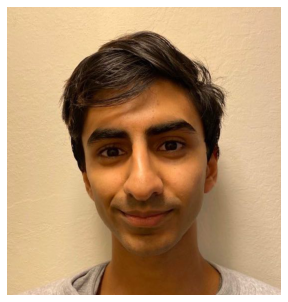

In [34]:
video_path = Path("output/bells.mov")
video_frames = morph.compute_morph_video(
    me, other, me_pts, other_pts, video_path, num_frames=100, fps=25, boomerang=False
)